<a href="https://colab.research.google.com/github/AbhishekNatani/Python-projects-and-codes/blob/main/MNSIT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import keras as ks
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [ ]:
print(tf.__version__)
print(ks.__version__)

2.14.0
2.14.0


In [ ]:
mnist = ks.datasets.mnist
abc = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
len(abc[0][1])

60000

In [ ]:
(X_train , y_train) , (X_test , y_test) = abc
(X_train.shape , y_train.shape , X_test.shape , y_test.shape)

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
import matplotlib as mlib
import matplotlib.pyplot as plt


<Axes: >

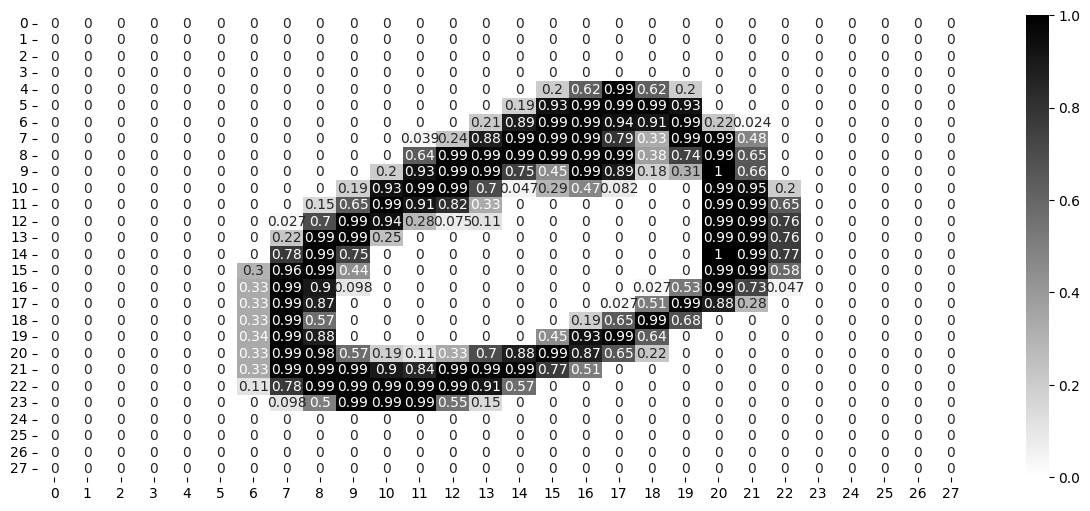

In [ ]:
plt.figure(figsize = (15,6))
sns.heatmap(X_train[1]/255 , annot = True , cmap = 'binary')

In [ ]:
# create a vaildate set
#scale my data by dividing with 255

In [ ]:
X_val , X_tr = X_train[:5000]/255 , X_train[5000:]/255
y_val , y_tr = y_train[:5000]/255 , y_train[5000:]/255


In [ ]:
X_te = X_test/255

VERY IMPORTANT FOR MODEL

In [ ]:
Layers = [ks.layers.Flatten(input_shape = [28,28] , name = 'inputlayer') , ks.layers.Dense(300,activation ='relu' , name ='HL1'),
          ks.layers.Dense(100,activation ='relu' , name ='HL2'),
          ks.layers.Dense(10,activation ='softmax' , name ='output')]
from keras.models import Sequential


In [ ]:
model_clf = Sequential(Layers)

every layer will have 1 bias as well , that's why it is  784 times 300 and then add 300 as well

In [ ]:
model_clf.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputlayer (Flatten)        (None, 784)               0         
                                                                 
 HL1 (Dense)                 (None, 300)               235500    
                                                                 
 HL2 (Dense)                 (None, 100)               30100     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
loss_func = "sparse_categorical_crossentropy"
Optimizer = "SGD"
Metrics =["accuracy"]

model_clf.compile(loss = loss_func, optimizer = Optimizer , metrics = Metrics)

In [ ]:
from absl.flags import ValidationError
Epochs = 10
val_data = (X_val , y_val)

lambton_mnist = model_clf.fit(X_tr , y_tr , epochs=Epochs , validation_data=val_data ,batch_size=40)

Epoch 1/10
1375/1375 [==============================] - 10s 7ms/step - loss: 0.0194 - accuracy: 0.0988 - val_loss: 7.9896e-04 - val_accuracy: 0.0958
Epoch 2/10
1375/1375 [==============================] - 8s 6ms/step - loss: 5.7364e-04 - accuracy: 0.0990 - val_loss: 3.6673e-04 - val_accuracy: 0.0958
Epoch 3/10
1375/1375 [==============================] - 9s 6ms/step - loss: 3.1846e-04 - accuracy: 0.0990 - val_loss: 2.3365e-04 - val_accuracy: 0.0958
Epoch 4/10
1375/1375 [==============================] - 14s 10ms/step - loss: 2.1944e-04 - accuracy: 0.0990 - val_loss: 1.6992e-04 - val_accuracy: 0.0958
Epoch 5/10
1375/1375 [==============================] - 14s 10ms/step - loss: 1.6678e-04 - accuracy: 0.0990 - val_loss: 1.3277e-04 - val_accuracy: 0.0958
Epoch 6/10
1375/1375 [==============================] - 10s 7ms/step - loss: 1.3417e-04 - accuracy: 0.0990 - val_loss: 1.0858e-04 - val_accuracy: 0.0958
Epoch 7/10
1375/1375 [==============================] - 7s 5ms/step - loss: 1.1202e-04

In [ ]:
x = pd.DataFrame(lambton_mnist.history)

<Axes: >

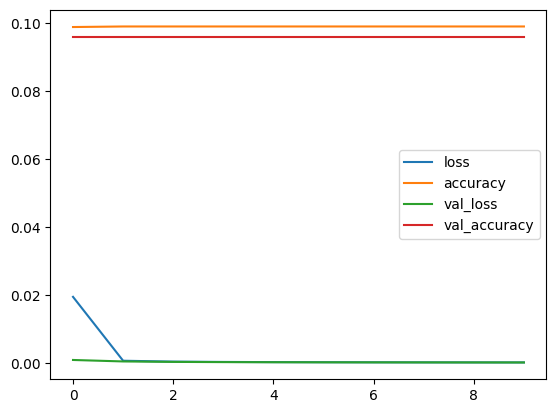

In [ ]:
x.plot()

In [ ]:
y_pred = model_clf.predict(X_test)

313/313 [==============================] - 2s 5ms/step


In [ ]:
model_clf.evaluate(X_te , y_test)

313/313 [==============================] - 1s 3ms/step - loss: 16.1201 - accuracy: 0.0980


[16.120105743408203, 0.09799999743700027]

just predicting for 3 records

In [ ]:
X_new = X_te[:4]

y_prob = model_clf.predict(X_new)
y_prob.round(3)

1/1 [==============================] - 0s 25ms/step


array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
y_pred = np.argmax(y_prob , axis = 1)

In [ ]:
y_pred

array([0, 0, 0, 0])